In [24]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

#setups
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [25]:
#Matplotlib setups
from matplotlib.ticker import FuncFormatter

In [26]:
#more Matplotlib setups
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [27]:
#more Matplotlib setups

plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

In [28]:
#update your Matplotlib styling
#this will apply to all your graphs if you do not change params when creating each different chart

# plt.rcParams.update({
#     'axes.facecolor': 'floralwhite',
#     'savefig.facecolor': 'floralwhite',
#     'figure.facecolor': 'floralwhite',
#     'axes.spines.left': True,
#     'axes.spines.bottom': True,
#     'axes.spines.top': False,
#     'axes.spines.right': False,
#     'axes.grid':True, 
#     'grid.color':'#54555A',
#     'grid.linewidth':.3,
#     'grid.alpha':.2,
#     'xtick.top': False,
#     'xtick.bottom': True,
#     'xtick.color': '#54555A',
#     'ytick.color':'#54555A',
#     'xtick.major.size': .3,
#     'xtick.major.width': .3,
#     'xtick.major.pad': 10,
#     'xtick.direction': 'in',
#     'xtick.labelsize': 'medium',
#     'legend.loc': 'best',
#     'legend.frameon': False,
#     'legend.columnspacing': 2.0,
#     'font.family': 'Calibri',
#     'font.size':12,
#     'text.color':'black',
#     'axes.titlesize': 14,
#     'axes.labelsize': 10,
#     'xtick.labelsize': 8,
#     'ytick.labelsize': 8
#      })

In [29]:
#check out all available Matplotlib parameters
#plt.rcParams.keys()

In [30]:
#groups
g84 = pd.read_csv('groups_84.csv', sep=';')
g84 = g84[g84.LANGUAGE_ID.str.contains('EL')]
g84=g84.rename(columns={'ID':'GROUP_ID'})
g84

,GROUP_ID,LANGUAGE_ID,ACRONYM,LABEL
6,GP0201,EL,S,Σοσιαλιστική Ομάδα
30,GP0202,EL,PPE,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...
54,GP0203,EL,ED,Ομάδα των Ευρωπαίων Δημοκρατών
78,GP0204,EL,COM,Κομμουνιστική ομάδα και Προσκείμενοι
102,GP0205,EL,L,Φιλελεύθερη και Δημοκρατική Ομάδα
126,GP0206,EL,RDE,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών
150,GP0207,EL,ARC,Ομάδα 'Ουράνιο Τόξο': Ομοσπονδία του Ευρωπαϊκο...
174,GP0208,EL,DR,Ομάδα των Κομμάτων της Ευρωπαϊκής Δεξιάς
198,NaN,EL,NI,Μη Εγγεγραμμένοι


In [31]:
#parties
p84 = pd.read_csv('parties_84.csv', sep=';')
p84 = p84[['DIVISION_ID','ID','ACRONYM']].copy()
p84 = p84[p84.DIVISION_ID.str.contains('EL')]
p84 = p84.rename(columns={'ID':'PARTY_ID'})
p84

,DIVISION_ID,PARTY_ID,ACRONYM
37,EL,EL01,PASOK
38,EL,EL02,ND
39,EL,EL03,KKE
40,EL,EL04,E.P.EN
41,EL,EL90,Other parties


In [32]:
omada84 = pd.read_csv('el_84.csv', sep=';')
omada84=omada84[['GROUP_ID','SEATS_TOTAL','SEATS_PERCENT_EU']].copy()
omada84

,GROUP_ID,SEATS_TOTAL,SEATS_PERCENT_EU
0,GP0201,10,2.3
1,GP0202,9,2.1
2,GP0203,0,0.0
3,GP0204,4,0.9
4,GP0205,0,0.0
5,GP0206,0,0.0
6,GP0207,0,0.0
7,GP0208,1,0.2
8,NaN,0,0.0


In [33]:
katataksh84 = pd.read_csv('katataksh_84.csv', sep=';')
katataksh84=katataksh84[['PARTY_ID','SEATS_TOTAL','GROUP_ID']].copy()
katataksh84

,PARTY_ID,SEATS_TOTAL,GROUP_ID
0,EL01,10,GP0201
1,EL02,9,GP0202
2,EL03,4,GP0204
3,EL04,1,GP0208


In [34]:
df84=pd.merge(katataksh84, omada84, on='GROUP_ID', how='outer')
df84

,PARTY_ID,SEATS_TOTAL_x,GROUP_ID,SEATS_TOTAL_y,SEATS_PERCENT_EU
0,EL01,10.0,GP0201,10,2.3
1,EL02,9.0,GP0202,9,2.1
2,EL03,4.0,GP0204,4,0.9
3,EL04,1.0,GP0208,1,0.2
4,NaN,NaN,GP0203,0,0.0
5,NaN,NaN,GP0205,0,0.0
6,NaN,NaN,GP0206,0,0.0
7,NaN,NaN,GP0207,0,0.0
8,NaN,NaN,NaN,0,0.0


In [35]:
df84=pd.merge(df84, g84, on='GROUP_ID', how='outer')
df84

,PARTY_ID,SEATS_TOTAL_x,GROUP_ID,SEATS_TOTAL_y,SEATS_PERCENT_EU,LANGUAGE_ID,ACRONYM,LABEL
0,EL01,10.0,GP0201,10,2.3,EL,S,Σοσιαλιστική Ομάδα
1,EL02,9.0,GP0202,9,2.1,EL,PPE,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...
2,EL03,4.0,GP0204,4,0.9,EL,COM,Κομμουνιστική ομάδα και Προσκείμενοι
3,EL04,1.0,GP0208,1,0.2,EL,DR,Ομάδα των Κομμάτων της Ευρωπαϊκής Δεξιάς
4,NaN,NaN,GP0203,0,0.0,EL,ED,Ομάδα των Ευρωπαίων Δημοκρατών
5,NaN,NaN,GP0205,0,0.0,EL,L,Φιλελεύθερη και Δημοκρατική Ομάδα
6,NaN,NaN,GP0206,0,0.0,EL,RDE,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών
7,NaN,NaN,GP0207,0,0.0,EL,ARC,Ομάδα 'Ουράνιο Τόξο': Ομοσπονδία του Ευρωπαϊκο...
8,NaN,NaN,NaN,0,0.0,EL,NI,Μη Εγγεγραμμένοι


In [36]:
df84=pd.merge(df84, p84, on='PARTY_ID', how='outer')
df84

,PARTY_ID,SEATS_TOTAL_x,GROUP_ID,SEATS_TOTAL_y,SEATS_PERCENT_EU,LANGUAGE_ID,ACRONYM_x,LABEL,DIVISION_ID,ACRONYM_y
0,EL01,10.0,GP0201,10.0,2.3,EL,S,Σοσιαλιστική Ομάδα,EL,PASOK
1,EL02,9.0,GP0202,9.0,2.1,EL,PPE,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,EL,ND
2,EL03,4.0,GP0204,4.0,0.9,EL,COM,Κομμουνιστική ομάδα και Προσκείμενοι,EL,KKE
3,EL04,1.0,GP0208,1.0,0.2,EL,DR,Ομάδα των Κομμάτων της Ευρωπαϊκής Δεξιάς,EL,E.P.EN
4,NaN,NaN,GP0203,0.0,0.0,EL,ED,Ομάδα των Ευρωπαίων Δημοκρατών,NaN,NaN
5,NaN,NaN,GP0205,0.0,0.0,EL,L,Φιλελεύθερη και Δημοκρατική Ομάδα,NaN,NaN
6,NaN,NaN,GP0206,0.0,0.0,EL,RDE,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,NaN,NaN
7,NaN,NaN,GP0207,0.0,0.0,EL,ARC,Ομάδα 'Ουράνιο Τόξο': Ομοσπονδία του Ευρωπαϊκο...,NaN,NaN
8,NaN,NaN,NaN,0.0,0.0,EL,NI,Μη Εγγεγραμμένοι,NaN,NaN
9,EL90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EL,Other parties


In [37]:
df84=df84[['PARTY_ID','SEATS_TOTAL_x','GROUP_ID','SEATS_TOTAL_y','SEATS_PERCENT_EU','LABEL', 'ACRONYM_y']].copy()
df84=df84.rename(columns={'SEATS_TOTAL_x':'SEATS_TOTAL_P'})
df84=df84.rename(columns={'SEATS_TOTAL_y':'SEATS_TOTAL_G'})
df84['YEAR'] = 1984
df84

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU,LABEL,ACRONYM_y,YEAR
0,EL01,10.0,GP0201,10.0,2.3,Σοσιαλιστική Ομάδα,PASOK,1984
1,EL02,9.0,GP0202,9.0,2.1,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,ND,1984
2,EL03,4.0,GP0204,4.0,0.9,Κομμουνιστική ομάδα και Προσκείμενοι,KKE,1984
3,EL04,1.0,GP0208,1.0,0.2,Ομάδα των Κομμάτων της Ευρωπαϊκής Δεξιάς,E.P.EN,1984
4,NaN,NaN,GP0203,0.0,0.0,Ομάδα των Ευρωπαίων Δημοκρατών,NaN,1984
5,NaN,NaN,GP0205,0.0,0.0,Φιλελεύθερη και Δημοκρατική Ομάδα,NaN,1984
6,NaN,NaN,GP0206,0.0,0.0,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,NaN,1984
7,NaN,NaN,GP0207,0.0,0.0,Ομάδα 'Ουράνιο Τόξο': Ομοσπονδία του Ευρωπαϊκο...,NaN,1984
8,NaN,NaN,NaN,0.0,0.0,Μη Εγγεγραμμένοι,NaN,1984
9,EL90,NaN,NaN,NaN,NaN,NaN,Other parties,1984


In [38]:
eu84 = pd.read_csv('eu_84.csv', sep=';')
eu84 = eu84[['GROUP_ID', 'SEATS_TOTAL','SEATS_PERCENT_EU']]

In [39]:
df84=pd.merge(df84, eu84, on='GROUP_ID', how='outer')
df84

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,LABEL,ACRONYM_y,YEAR,SEATS_TOTAL,SEATS_PERCENT_EU_y
0,EL01,10.0,GP0201,10.0,2.3,Σοσιαλιστική Ομάδα,PASOK,1984,130,29.9
1,EL02,9.0,GP0202,9.0,2.1,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,ND,1984,110,25.4
2,EL03,4.0,GP0204,4.0,0.9,Κομμουνιστική ομάδα και Προσκείμενοι,KKE,1984,41,9.4
3,EL04,1.0,GP0208,1.0,0.2,Ομάδα των Κομμάτων της Ευρωπαϊκής Δεξιάς,E.P.EN,1984,16,3.7
4,NaN,NaN,GP0203,0.0,0.0,Ομάδα των Ευρωπαίων Δημοκρατών,NaN,1984,50,11.5
5,NaN,NaN,GP0205,0.0,0.0,Φιλελεύθερη και Δημοκρατική Ομάδα,NaN,1984,31,7.1
6,NaN,NaN,GP0206,0.0,0.0,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,NaN,1984,29,6.7
7,NaN,NaN,GP0207,0.0,0.0,Ομάδα 'Ουράνιο Τόξο': Ομοσπονδία του Ευρωπαϊκο...,NaN,1984,20,4.6
8,NaN,NaN,NaN,0.0,0.0,Μη Εγγεγραμμένοι,NaN,1984,7,1.6
9,EL90,NaN,NaN,NaN,NaN,NaN,Other parties,1984,7,1.6


In [40]:
g89 = pd.read_csv('groups_89.csv', sep=';')
g89 = g89[g89.LANGUAGE_ID.str.contains('EL')]
g89=g89.rename(columns={'ID':'GROUP_ID'})
g89

,GROUP_ID,LANGUAGE_ID,ACRONYM,LABEL
6,GP0401,EL,S,Σοσιαλιστική Ομάδα
30,GP0402,EL,PPE,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...
54,GP0403,EL,LDR,"Φιλελεύθερη, Δημοκρατική και Μεταρρυθμιστική Ο..."
78,GP0404,EL,ED,Ομάδα των Ευρωπαίων Δημοκρατών
102,GP0405,EL,V,Ομάδα των Πρασίνων στο Ευρωπαϊκό Κοινοβούλιο
126,GP0406,EL,GUE,Ομάδα για την Ευρωπαϊκή Ενωτική Αριστερά
150,GP0407,EL,RDE,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών
174,GP0408,EL,DR,Ομάδα Τεχνικού Συντονισμού των Κομμάτων της Ευ...
198,GP0409,EL,CG,Συνασπισμός της Αριστεράς
222,GP0410,EL,ARC,Ομάδα Ουράνιου Τόξου στο Ευρωπαϊκό Κοινοβούλιο


In [41]:
p89 = pd.read_csv('parties_89.csv', sep=';')
p89 = p89[['DIVISION_ID','ID','ACRONYM']].copy()
p89 = p89[p89.DIVISION_ID.str.contains('EL')]
p89 = p89.rename(columns={'ID':'PARTY_ID'})
p89

,DIVISION_ID,PARTY_ID,ACRONYM
44,EL,EL01,PA.SO.K.
45,EL,EL02,N.D.
46,EL,EL03,SYN
47,EL,EL04,DI.ANA
48,EL,EL90,Other parties


In [42]:
omada89 = pd.read_csv('el_89.csv', sep=';')
omada89=omada89[['GROUP_ID','SEATS_TOTAL','SEATS_PERCENT_EU']].copy()
omada89

,GROUP_ID,SEATS_TOTAL,SEATS_PERCENT_EU
0,GP0401,9,1.7
1,GP0402,10,1.9
2,GP0403,0,0.0
3,GP0404,0,0.0
4,GP0405,0,0.0
5,GP0406,1,0.2
6,GP0407,1,0.2
7,GP0408,0,0.0
8,GP0409,3,0.6
9,GP0410,0,0.0


In [43]:
katataksh89 = pd.read_csv('katataksh_89.csv', sep=';')
katataksh89=katataksh89[['PARTY_ID','SEATS_TOTAL','GROUP_ID']].copy()
katataksh89

,PARTY_ID,SEATS_TOTAL,GROUP_ID
0,EL01,9,GP0401
1,EL02,10,GP0402
2,EL03,1,GP0406
3,EL03,3,GP0409
4,EL04,1,GP0407


In [44]:
df89=pd.merge(katataksh89, omada89, on='GROUP_ID', how='outer')
df89=pd.merge(df89, g89, on='GROUP_ID', how='outer')
df89=pd.merge(df89, p89, on='PARTY_ID', how='outer')
df89=df89[['PARTY_ID','SEATS_TOTAL_x','GROUP_ID','SEATS_TOTAL_y','SEATS_PERCENT_EU','LABEL', 'ACRONYM_y']].copy()
df89=df89.rename(columns={'SEATS_TOTAL_x':'SEATS_TOTAL_P'})
df89=df89.rename(columns={'SEATS_TOTAL_y':'SEATS_TOTAL_G'})
df89['YEAR'] = 1989
df89

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU,LABEL,ACRONYM_y,YEAR
0,EL01,9.0,GP0401,9.0,1.7,Σοσιαλιστική Ομάδα,PA.SO.K.,1989
1,EL02,10.0,GP0402,10.0,1.9,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,N.D.,1989
2,EL03,1.0,GP0406,1.0,0.2,Ομάδα για την Ευρωπαϊκή Ενωτική Αριστερά,SYN,1989
3,EL03,3.0,GP0409,3.0,0.6,Συνασπισμός της Αριστεράς,SYN,1989
4,EL04,1.0,GP0407,1.0,0.2,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,DI.ANA,1989
5,NaN,NaN,GP0403,0.0,0.0,"Φιλελεύθερη, Δημοκρατική και Μεταρρυθμιστική Ο...",NaN,1989
6,NaN,NaN,GP0404,0.0,0.0,Ομάδα των Ευρωπαίων Δημοκρατών,NaN,1989
7,NaN,NaN,GP0405,0.0,0.0,Ομάδα των Πρασίνων στο Ευρωπαϊκό Κοινοβούλιο,NaN,1989
8,NaN,NaN,GP0408,0.0,0.0,Ομάδα Τεχνικού Συντονισμού των Κομμάτων της Ευ...,NaN,1989
9,NaN,NaN,GP0410,0.0,0.0,Ομάδα Ουράνιου Τόξου στο Ευρωπαϊκό Κοινοβούλιο,NaN,1989


In [45]:
eu89 = pd.read_csv('eu_89.csv', sep=';')
eu89 = eu89[['GROUP_ID', 'SEATS_TOTAL','SEATS_PERCENT_EU']]
eu89

,GROUP_ID,SEATS_TOTAL,SEATS_PERCENT_EU
0,GP0401,180,34.8
1,GP0402,121,23.4
2,GP0403,49,9.5
3,GP0404,34,6.6
4,GP0405,30,5.8
5,GP0406,28,5.4
6,GP0407,20,3.9
7,GP0408,17,3.3
8,GP0409,14,2.7
9,GP0410,13,2.5


In [46]:
df89=pd.merge(df89, eu89, on='GROUP_ID', how='outer')
df89

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,LABEL,ACRONYM_y,YEAR,SEATS_TOTAL,SEATS_PERCENT_EU_y
0,EL01,9.0,GP0401,9.0,1.7,Σοσιαλιστική Ομάδα,PA.SO.K.,1989,180,34.8
1,EL02,10.0,GP0402,10.0,1.9,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,N.D.,1989,121,23.4
2,EL03,1.0,GP0406,1.0,0.2,Ομάδα για την Ευρωπαϊκή Ενωτική Αριστερά,SYN,1989,28,5.4
3,EL03,3.0,GP0409,3.0,0.6,Συνασπισμός της Αριστεράς,SYN,1989,14,2.7
4,EL04,1.0,GP0407,1.0,0.2,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,DI.ANA,1989,20,3.9
5,NaN,NaN,GP0403,0.0,0.0,"Φιλελεύθερη, Δημοκρατική και Μεταρρυθμιστική Ο...",NaN,1989,49,9.5
6,NaN,NaN,GP0404,0.0,0.0,Ομάδα των Ευρωπαίων Δημοκρατών,NaN,1989,34,6.6
7,NaN,NaN,GP0405,0.0,0.0,Ομάδα των Πρασίνων στο Ευρωπαϊκό Κοινοβούλιο,NaN,1989,30,5.8
8,NaN,NaN,GP0408,0.0,0.0,Ομάδα Τεχνικού Συντονισμού των Κομμάτων της Ευ...,NaN,1989,17,3.3
9,NaN,NaN,GP0410,0.0,0.0,Ομάδα Ουράνιου Τόξου στο Ευρωπαϊκό Κοινοβούλιο,NaN,1989,13,2.5


In [47]:
g94 = pd.read_csv('groups_94.csv', sep=';')
g94 = g94[g94.LANGUAGE_ID.str.contains('EL')]
g94=g94.rename(columns={'ID':'GROUP_ID'})

In [48]:
p94 = pd.read_csv('parties_94.csv', sep=';')
p94 = p94[['DIVISION_ID','ID','ACRONYM']].copy()
p94 = p94[p94.DIVISION_ID.str.contains('EL')]
p94 = p94.rename(columns={'ID':'PARTY_ID'})
p94

,DIVISION_ID,PARTY_ID,ACRONYM
49,EL,EL01,PASOK
50,EL,EL02,N.D.
51,EL,EL03,KKE
52,EL,EL04,SYN
53,EL,EL05,POL.AN
54,EL,EL90,Other parties


In [49]:
omada94 = pd.read_csv('el_94.csv', sep=';')
omada94=omada94[['GROUP_ID','SEATS_TOTAL','SEATS_PERCENT_EU']].copy()

In [50]:
katataksh94 = pd.read_csv('katataksh_94.csv', sep=';')
katataksh94=katataksh94[['PARTY_ID','SEATS_TOTAL','GROUP_ID']].copy()

In [51]:
df94=pd.merge(katataksh94, omada94, on='GROUP_ID', how='outer')
df94=pd.merge(df94, g94, on='GROUP_ID', how='outer')
df94=pd.merge(df94, p94, on='PARTY_ID', how='outer')
df94=df94[['PARTY_ID','SEATS_TOTAL_x','GROUP_ID','SEATS_TOTAL_y','SEATS_PERCENT_EU','LABEL','ACRONYM_y']].copy()
df94=df94.rename(columns={'SEATS_TOTAL_x':'SEATS_TOTAL_P'})
df94=df94.rename(columns={'SEATS_TOTAL_y':'SEATS_TOTAL_G'})
df94['YEAR'] = 1994
df94

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU,LABEL,ACRONYM_y,YEAR
0,EL01,10.0,GP0601,10.0,1.8,Ομάδα του Ευρωπαϊκού Σοσιαλιστικού Κόμματος,PASOK,1994
1,EL02,9.0,GP0602,9.0,1.6,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,N.D.,1994
2,EL03,2.0,GP0604,4.0,0.7,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,KKE,1994
3,EL04,2.0,GP0604,4.0,0.7,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,SYN,1994
4,EL05,2.0,GP0606,2.0,0.3,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,POL.AN,1994
5,NaN,NaN,GP0603,0.0,0.0,Ομάδα του Ευρωπαϊκού Κόμματος των Φιλελευθέρων...,NaN,1994
6,NaN,NaN,GP0605,0.0,0.0,Ομάδα Forza Europa,NaN,1994
7,NaN,NaN,GP0607,0.0,0.0,Ομάδα των Πρασίνων στο Ευρωπαϊκό Κοινοβούλιο,NaN,1994
8,NaN,NaN,GP0608,0.0,0.0,Ομάδα της Ευρωπαϊκής Ριζοσπαστικής Συμμαχίας,NaN,1994
9,NaN,NaN,GP0609,0.0,0.0,Ομάδα Ευρώπη των Εθνών (Ομάδα συντονισμού),NaN,1994


In [52]:
eu94 = pd.read_csv('eu_94.csv', sep=';')
eu94 = eu94[['GROUP_ID', 'SEATS_TOTAL','SEATS_PERCENT_EU']]
eu94

,GROUP_ID,SEATS_TOTAL,SEATS_PERCENT_EU
0,GP0601,198,34.9
1,GP0602,156,27.5
2,GP0603,44,7.8
3,GP0604,28,4.9
4,GP0605,27,4.8
5,GP0606,26,4.6
6,GP0607,23,4.1
7,GP0608,19,3.4
8,GP0609,19,3.4
9,NaN,27,4.8


In [53]:
df94=pd.merge(df94, eu94, on='GROUP_ID', how='outer')
df94

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,LABEL,ACRONYM_y,YEAR,SEATS_TOTAL,SEATS_PERCENT_EU_y
0,EL01,10.0,GP0601,10.0,1.8,Ομάδα του Ευρωπαϊκού Σοσιαλιστικού Κόμματος,PASOK,1994,198,34.9
1,EL02,9.0,GP0602,9.0,1.6,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,N.D.,1994,156,27.5
2,EL03,2.0,GP0604,4.0,0.7,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,KKE,1994,28,4.9
3,EL04,2.0,GP0604,4.0,0.7,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,SYN,1994,28,4.9
4,EL05,2.0,GP0606,2.0,0.3,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,POL.AN,1994,26,4.6
5,NaN,NaN,GP0603,0.0,0.0,Ομάδα του Ευρωπαϊκού Κόμματος των Φιλελευθέρων...,NaN,1994,44,7.8
6,NaN,NaN,GP0605,0.0,0.0,Ομάδα Forza Europa,NaN,1994,27,4.8
7,NaN,NaN,GP0607,0.0,0.0,Ομάδα των Πρασίνων στο Ευρωπαϊκό Κοινοβούλιο,NaN,1994,23,4.1
8,NaN,NaN,GP0608,0.0,0.0,Ομάδα της Ευρωπαϊκής Ριζοσπαστικής Συμμαχίας,NaN,1994,19,3.4
9,NaN,NaN,GP0609,0.0,0.0,Ομάδα Ευρώπη των Εθνών (Ομάδα συντονισμού),NaN,1994,19,3.4


In [54]:
g99 = pd.read_csv('groups_99.csv', sep=';')
g99 = g99[g99.LANGUAGE_ID.str.contains('EL')]
g99=g99.rename(columns={'ID':'GROUP_ID'})

In [55]:
p99 = pd.read_csv('parties_99.csv', sep=';')
p99 = p99[['DIVISION_ID','ID','ACRONYM']].copy()
p99 = p99[p99.DIVISION_ID.str.contains('EL')]
p99 = p99.rename(columns={'ID':'PARTY_ID'})

In [56]:
omada99 = pd.read_csv('el_99.csv', sep=';')
omada99=omada99[['GROUP_ID','SEATS_TOTAL','SEATS_PERCENT_EU']].copy()

In [57]:
katataksh99 = pd.read_csv('katataksh_99.csv', sep=';')
katataksh99=katataksh99[['PARTY_ID','SEATS_TOTAL','GROUP_ID']].copy()

In [58]:
df99=pd.merge(katataksh99, omada99, on='GROUP_ID', how='outer')
df99=pd.merge(df99, g99, on='GROUP_ID', how='outer')
df99=pd.merge(df99, p99, on='PARTY_ID', how='outer')
df99=df99[['PARTY_ID','SEATS_TOTAL_x','GROUP_ID','SEATS_TOTAL_y','SEATS_PERCENT_EU','LABEL', 'ACRONYM_y']].copy()
df99=df99.rename(columns={'SEATS_TOTAL_x':'SEATS_TOTAL_P'})
df99=df99.rename(columns={'SEATS_TOTAL_y':'SEATS_TOTAL_G'})
df99['YEAR'] = 1999
df99

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU,LABEL,ACRONYM_y,YEAR
0,EL01,9.0,GP0801,9.0,1.4,Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κόμματoς (Χριστιαv...,N.D.,1999
1,EL02,9.0,GP0802,9.0,1.4,Ομάδα του Ευρωπαϊκού Σοσιαλιστικού Κόμματος,PA.SO.K.,1999
2,EL03,3.0,GP0805,7.0,1.1,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,KKE,1999
3,EL04,2.0,GP0805,7.0,1.1,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,SYN,1999
4,EL05,2.0,GP0805,7.0,1.1,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,DIKKI,1999
5,NaN,NaN,GP0803,0.0,0.0,Ομάδα του Ευρωπαϊκού Κόμματος των Φιλελευθέρων...,NaN,1999
6,NaN,NaN,GP0804,0.0,0.0,Ομάδα τωv Πρασίvωv / Ευρωπαϊκή Ελεύθερη Συμμαχία,NaN,1999
7,NaN,NaN,GP0806,0.0,0.0,Ομάδα ΄Εvωση για τηv Ευρώπη τωv Εθvώv,NaN,1999
8,NaN,NaN,GP0807,0.0,0.0,Ομάδα Τεχvικoύ Συvτovισμoύ τωv Αvεξαρτήτωv Βoυ...,NaN,1999
9,NaN,NaN,GP0808,0.0,0.0,Ομάδα για την Ευρώπη της Δημoκρατίας και της Δ...,NaN,1999


In [59]:
eu99 = pd.read_csv('eu_99.csv', sep=';')
eu99 = eu99[['GROUP_ID', 'SEATS_TOTAL','SEATS_PERCENT_EU']]
eu99

,GROUP_ID,SEATS_TOTAL,SEATS_PERCENT_EU
0,GP0801,232,37.1
1,GP0802,180,28.8
2,GP0803,50,8.0
3,GP0804,48,7.7
4,GP0805,42,6.7
5,GP0806,31,5.0
6,GP0807,18,2.9
7,GP0808,16,2.6
8,NaN,9,1.0


In [60]:
df99=pd.merge(df99, eu99, on='GROUP_ID', how='outer')
df99

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,LABEL,ACRONYM_y,YEAR,SEATS_TOTAL,SEATS_PERCENT_EU_y
0,EL01,9.0,GP0801,9.0,1.4,Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κόμματoς (Χριστιαv...,N.D.,1999,232,37.1
1,EL02,9.0,GP0802,9.0,1.4,Ομάδα του Ευρωπαϊκού Σοσιαλιστικού Κόμματος,PA.SO.K.,1999,180,28.8
2,EL03,3.0,GP0805,7.0,1.1,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,KKE,1999,42,6.7
3,EL04,2.0,GP0805,7.0,1.1,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,SYN,1999,42,6.7
4,EL05,2.0,GP0805,7.0,1.1,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,DIKKI,1999,42,6.7
5,NaN,NaN,GP0803,0.0,0.0,Ομάδα του Ευρωπαϊκού Κόμματος των Φιλελευθέρων...,NaN,1999,50,8.0
6,NaN,NaN,GP0804,0.0,0.0,Ομάδα τωv Πρασίvωv / Ευρωπαϊκή Ελεύθερη Συμμαχία,NaN,1999,48,7.7
7,NaN,NaN,GP0806,0.0,0.0,Ομάδα ΄Εvωση για τηv Ευρώπη τωv Εθvώv,NaN,1999,31,5.0
8,NaN,NaN,GP0807,0.0,0.0,Ομάδα Τεχvικoύ Συvτovισμoύ τωv Αvεξαρτήτωv Βoυ...,NaN,1999,18,2.9
9,NaN,NaN,GP0808,0.0,0.0,Ομάδα για την Ευρώπη της Δημoκρατίας και της Δ...,NaN,1999,16,2.6


In [61]:
groups04=pd.read_csv('groups_2004.csv',sep=';')
groups04=groups04[groups04.LANGUAGE_ID.str.contains('EL')]
groups04=groups04.rename(columns={'ID':'GROUP_ID'})

In [62]:
parties04 = pd.read_csv('parties_2004.csv', sep=';')
parties04 = parties04[['DIVISION_ID','ID','ACRONYM']].copy()
parties04 = parties04[parties04.DIVISION_ID.str.contains('EL')]
parties04 = parties04.rename(columns={'ID':'PARTY_ID'})

In [63]:
omada04=pd.read_csv('omada_2004.csv',sep=';')
omada04=omada04[['GROUP_ID','SEATS_TOTAL','SEATS_PERCENT_EU']].copy()

In [64]:
katataksh04=pd.read_csv('katataksh_2004.csv',sep=';')
katataksh04=katataksh04[['PARTY_ID','SEATS_TOTAL','GROUP_ID']].copy()

In [65]:
df04=pd.merge(katataksh04, omada04, on='GROUP_ID', how='outer')
df04=pd.merge(df04, groups04, on='GROUP_ID', how='outer')
df04=pd.merge(df04, parties04, on='PARTY_ID', how='outer')
df04=df04[['PARTY_ID','SEATS_TOTAL_x','GROUP_ID','SEATS_TOTAL_y','SEATS_PERCENT_EU','LABEL', 'ACRONYM_y']].copy()
df04=df04.rename(columns={'SEATS_TOTAL_x':'SEATS_TOTAL_P'})
df04=df04.rename(columns={'SEATS_TOTAL_y':'SEATS_TOTAL_G'})
df04['YEAR'] = 2004
df04

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU,LABEL,ACRONYM_y,YEAR
0,EL01,11.0,GP1001,11.0,1.5,Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κόμματoς (Χριστιαv...,N.D./Ν.Δ.,2004
1,EL02,8.0,GP1002,8.0,1.1,Σοσιαλιστική Ομάδα στο Ευρωπαϊκό Κοινοβούλιο,PASOK//ΠΑΣΟΚ,2004
2,EL03,3.0,GP1005,4.0,0.6,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,KKE,2004
3,EL04,1.0,GP1005,4.0,0.6,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,SYN/ΣΥΝ,2004
4,EL05,1.0,GP1007,1.0,0.1,Ομάδα Ανεξαρτησία/Δημοκρατία,LAOS/ΛΑΟΣ,2004
5,NaN,NaN,GP1003,0.0,0.0,Ομάδα της Συμμαχίας Φιλελευθέρων και Δημοκρατώ...,NaN,2004
6,NaN,NaN,GP1004,0.0,0.0,Ομάδα τωv Πρασίvωv / Ευρωπαϊκή Ελεύθερη Συμμαχία,NaN,2004
7,NaN,NaN,GP1006,0.0,0.0,Ομάδα Έvωση για τηv Ευρώπη τωv Εθvώv,NaN,2004
8,NaN,NaN,NaN,0.0,0.0,Μη Εγγεγραμμένοι,NaN,2004
9,EL90,NaN,NaN,NaN,NaN,NaN,Other parties,2004


In [66]:
eu04 = pd.read_csv('eu_04.csv', sep=';')
eu04 = eu04[['GROUP_ID', 'SEATS_TOTAL','SEATS_PERCENT_EU']]
eu04

,GROUP_ID,SEATS_TOTAL,SEATS_PERCENT_EU
0,GP1001,268,36.6
1,GP1002,200,27.3
2,GP1003,88,12.0
3,GP1004,42,5.7
4,GP1005,41,5.6
5,GP1006,27,3.7
6,GP1007,37,5.0
7,NaN,29,4.0


In [67]:
df04=pd.merge(df04, eu04, on='GROUP_ID', how='outer')
df04

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,LABEL,ACRONYM_y,YEAR,SEATS_TOTAL,SEATS_PERCENT_EU_y
0,EL01,11.0,GP1001,11.0,1.5,Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κόμματoς (Χριστιαv...,N.D./Ν.Δ.,2004,268,36.6
1,EL02,8.0,GP1002,8.0,1.1,Σοσιαλιστική Ομάδα στο Ευρωπαϊκό Κοινοβούλιο,PASOK//ΠΑΣΟΚ,2004,200,27.3
2,EL03,3.0,GP1005,4.0,0.6,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,KKE,2004,41,5.6
3,EL04,1.0,GP1005,4.0,0.6,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,SYN/ΣΥΝ,2004,41,5.6
4,EL05,1.0,GP1007,1.0,0.1,Ομάδα Ανεξαρτησία/Δημοκρατία,LAOS/ΛΑΟΣ,2004,37,5.0
5,NaN,NaN,GP1003,0.0,0.0,Ομάδα της Συμμαχίας Φιλελευθέρων και Δημοκρατώ...,NaN,2004,88,12.0
6,NaN,NaN,GP1004,0.0,0.0,Ομάδα τωv Πρασίvωv / Ευρωπαϊκή Ελεύθερη Συμμαχία,NaN,2004,42,5.7
7,NaN,NaN,GP1006,0.0,0.0,Ομάδα Έvωση για τηv Ευρώπη τωv Εθvώv,NaN,2004,27,3.7
8,NaN,NaN,NaN,0.0,0.0,Μη Εγγεγραμμένοι,NaN,2004,29,4.0
9,EL90,NaN,NaN,NaN,NaN,NaN,Other parties,2004,29,4.0


In [68]:
parties09 = pd.read_csv('parties_2009.csv', sep=';')
parties09 = parties09[['DIVISION_ID','ID','ACRONYM']].copy()
parties09 = parties09[parties09.DIVISION_ID.str.contains('EL')]
parties09 = parties09.rename(columns={'ID':'PARTY_ID'})

In [69]:
groups09=pd.read_csv('groups_2009.csv',sep=';')
groups09=groups09[groups09.LANGUAGE_ID.str.contains('EL')]
groups09=groups09.rename(columns={'ID':'GROUP_ID'})

In [70]:
omada09=pd.read_csv('omada_2009.csv',sep=';')
omada09=omada09[['GROUP_ID','SEATS_TOTAL','SEATS_PERCENT_EU']].copy()

In [71]:
katataksh09=pd.read_csv('katataksh_2009.csv',sep=';')
katataksh09=katataksh09[['PARTY_ID','SEATS_TOTAL','GROUP_ID']].copy()

In [72]:
df09=pd.merge(katataksh09, omada09, on='GROUP_ID', how='outer')
df09=pd.merge(df09, groups09, on='GROUP_ID', how='outer')
df09=pd.merge(df09, parties09, on='PARTY_ID', how='outer')
df09=df09[['PARTY_ID','SEATS_TOTAL_x','GROUP_ID','SEATS_TOTAL_y','SEATS_PERCENT_EU','ACRONYM_y','LABEL']].copy()
df09=df09.rename(columns={'SEATS_TOTAL_x':'SEATS_TOTAL_P'})
df09=df09.rename(columns={'SEATS_TOTAL_y':'SEATS_TOTAL_G'})
df09['YEAR'] = 2009
df09

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU,ACRONYM_y,LABEL,YEAR
0,EL01,8.0,GP1201,8.0,1.1,N.D,Κoιvoβoυλευτική Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κό...,2009
1,EL02,8.0,GP1202,8.0,1.1,PA.SO.K,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,2009
2,EL03,1.0,GP1204,1.0,0.1,OP,Ομάδα τωv Πρασίvωv / Ευρωπαϊκή Ελεύθερη Συμμαχία,2009
3,EL04,2.0,GP1206,3.0,0.4,K.K.E,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,2009
4,EL05,1.0,GP1206,3.0,0.4,SY.RIZ.A,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,2009
5,EL06,2.0,GP1207,2.0,0.3,LA.O.S,Ευρώπη ελευθερίας και δημοκρατίας,2009
6,NaN,NaN,GP1203,0.0,0.0,NaN,Ομάδα της Συμμαχίας Φιλελευθέρων και Δημοκρατώ...,2009
7,NaN,NaN,GP1205,0.0,0.0,NaN,Ομάδα των Ευρωπαίων Συντηρητικών και Μεταρρυθμ...,2009
8,NaN,NaN,NaN,0.0,0.0,NaN,Μη Εγγεγραμμένοι,2009
9,EL90,NaN,NaN,NaN,NaN,Other parties,NaN,2009


In [73]:
eu09 = pd.read_csv('eu_09.csv', sep=';')
eu09 = eu09[['GROUP_ID', 'SEATS_TOTAL','SEATS_PERCENT_EU']]
eu09

,GROUP_ID,SEATS_TOTAL,SEATS_PERCENT_EU
0,GP1201,265,36.0
1,GP1202,184,25.0
2,GP1203,84,11.4
3,GP1204,55,7.5
4,GP1205,54,7.3
5,GP1206,35,4.8
6,GP1207,32,4.3
7,NaN,27,3.7


In [74]:
df09=pd.merge(df09, eu09, on='GROUP_ID', how='outer')
df09

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,ACRONYM_y,LABEL,YEAR,SEATS_TOTAL,SEATS_PERCENT_EU_y
0,EL01,8.0,GP1201,8.0,1.1,N.D,Κoιvoβoυλευτική Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κό...,2009,265,36.0
1,EL02,8.0,GP1202,8.0,1.1,PA.SO.K,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,2009,184,25.0
2,EL03,1.0,GP1204,1.0,0.1,OP,Ομάδα τωv Πρασίvωv / Ευρωπαϊκή Ελεύθερη Συμμαχία,2009,55,7.5
3,EL04,2.0,GP1206,3.0,0.4,K.K.E,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,2009,35,4.8
4,EL05,1.0,GP1206,3.0,0.4,SY.RIZ.A,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,2009,35,4.8
5,EL06,2.0,GP1207,2.0,0.3,LA.O.S,Ευρώπη ελευθερίας και δημοκρατίας,2009,32,4.3
6,NaN,NaN,GP1203,0.0,0.0,NaN,Ομάδα της Συμμαχίας Φιλελευθέρων και Δημοκρατώ...,2009,84,11.4
7,NaN,NaN,GP1205,0.0,0.0,NaN,Ομάδα των Ευρωπαίων Συντηρητικών και Μεταρρυθμ...,2009,54,7.3
8,NaN,NaN,NaN,0.0,0.0,NaN,Μη Εγγεγραμμένοι,2009,27,3.7
9,EL90,NaN,NaN,NaN,NaN,Other parties,NaN,2009,27,3.7


In [75]:
parties14 = pd.read_csv('parties_2014.csv', sep=';')
parties14 = parties14[['DIVISION_ID','ID','ACRONYM']].copy()
parties14 = parties14[parties14.DIVISION_ID.str.contains('EL')]
parties14 = parties14.rename(columns={'ID':'PARTY_ID'})

In [76]:
groups14=pd.read_csv('groups_2014.csv',sep=';')
groups14=groups14[groups14.LANGUAGE_ID.str.contains('EL')]
groups14=groups14.rename(columns={'ID':'GROUP_ID'})

In [77]:
omada14=pd.read_csv('omada_2014.csv',sep=';')
omada14=omada14[['GROUP_ID','SEATS_TOTAL','SEATS_PERCENT_EU']].copy()

In [78]:
katataksh14=pd.read_csv('katataksh_2014.csv',sep=';')
katataksh14=katataksh14[['PARTY_ID','SEATS_TOTAL','GROUP_ID']].copy()

In [79]:
df14=pd.merge(katataksh14, omada14, on='GROUP_ID', how='outer')
df14=pd.merge(df14, groups14, on='GROUP_ID', how='outer')
df14=pd.merge(df14, parties14, on='PARTY_ID', how='outer')
df14=df14[['PARTY_ID','SEATS_TOTAL_x','GROUP_ID','SEATS_TOTAL_y','SEATS_PERCENT_EU','LABEL', 'ACRONYM_y']].copy()
df14=df14.rename(columns={'SEATS_TOTAL_x':'SEATS_TOTAL_P'})
df14=df14.rename(columns={'SEATS_TOTAL_y':'SEATS_TOTAL_G'})
df14['YEAR'] = 2014
df14

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU,LABEL,ACRONYM_y,YEAR
0,EL01,5.0,GP1401,5.0,0.7,Κoιvoβoυλευτική Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κό...,Ν.Δ/N.D,2014
1,EL02,2.0,GP1402,4.0,0.5,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,To Πoτάμι/To Potami,2014
2,EL04,2.0,GP1402,4.0,0.5,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,ΠΑΣΟΚ / PASOK,2014
3,EL03,2.0,NaN,5.0,0.7,Μη Εγγεγραμμένοι,ΕΛΙΆ ΔΠ / ELIA DA,2014
4,EL06,6.0,NaN,5.0,0.7,Μη Εγγεγραμμένοι,ΣΥ.ΡΙΖ.Α/SY.RIZ.A.,2014
5,EL08,2.0,NaN,5.0,0.7,Μη Εγγεγραμμένοι,KKE,2014
6,EL09,3.0,NaN,5.0,0.7,Μη Εγγεγραμμένοι,X.A.,2014
7,EL05,1.0,GP1403,1.0,0.1,Ομάδα των Ευρωπαίων Συντηρητικών και Μεταρρυθμ...,ΑΝ.ΕΛ/ANEL,2014
8,EL07,6.0,GP1405,6.0,0.8,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,SY.RIZ.A.,2014
9,NaN,NaN,GP1404,0.0,0.0,Ομάδα της Συμμαχίας Φιλελευθέρων και Δημοκρατώ...,NaN,2014


In [80]:
df14 = df14.drop(labels=[3,4], axis=0)
df14

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU,LABEL,ACRONYM_y,YEAR
0,EL01,5.0,GP1401,5.0,0.7,Κoιvoβoυλευτική Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κό...,Ν.Δ/N.D,2014
1,EL02,2.0,GP1402,4.0,0.5,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,To Πoτάμι/To Potami,2014
2,EL04,2.0,GP1402,4.0,0.5,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,ΠΑΣΟΚ / PASOK,2014
5,EL08,2.0,NaN,5.0,0.7,Μη Εγγεγραμμένοι,KKE,2014
6,EL09,3.0,NaN,5.0,0.7,Μη Εγγεγραμμένοι,X.A.,2014
7,EL05,1.0,GP1403,1.0,0.1,Ομάδα των Ευρωπαίων Συντηρητικών και Μεταρρυθμ...,ΑΝ.ΕΛ/ANEL,2014
8,EL07,6.0,GP1405,6.0,0.8,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,SY.RIZ.A.,2014
9,NaN,NaN,GP1404,0.0,0.0,Ομάδα της Συμμαχίας Φιλελευθέρων και Δημοκρατώ...,NaN,2014
10,NaN,NaN,GP1406,0.0,0.0,Ομάδα τωv Πρασίvωv / Ευρωπαϊκή Ελεύθερη Συμμαχία,NaN,2014
11,NaN,NaN,GP1407,0.0,0.0,Ομάδα Ευρώπη Ελευθερίας και Άμεσης Δημοκρατίας,NaN,2014


In [81]:
df14.reset_index(0)

,index,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU,LABEL,ACRONYM_y,YEAR
0,0,EL01,5.0,GP1401,5.0,0.7,Κoιvoβoυλευτική Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κό...,Ν.Δ/N.D,2014
1,1,EL02,2.0,GP1402,4.0,0.5,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,To Πoτάμι/To Potami,2014
2,2,EL04,2.0,GP1402,4.0,0.5,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,ΠΑΣΟΚ / PASOK,2014
3,5,EL08,2.0,NaN,5.0,0.7,Μη Εγγεγραμμένοι,KKE,2014
4,6,EL09,3.0,NaN,5.0,0.7,Μη Εγγεγραμμένοι,X.A.,2014
5,7,EL05,1.0,GP1403,1.0,0.1,Ομάδα των Ευρωπαίων Συντηρητικών και Μεταρρυθμ...,ΑΝ.ΕΛ/ANEL,2014
6,8,EL07,6.0,GP1405,6.0,0.8,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,SY.RIZ.A.,2014
7,9,NaN,NaN,GP1404,0.0,0.0,Ομάδα της Συμμαχίας Φιλελευθέρων και Δημοκρατώ...,NaN,2014
8,10,NaN,NaN,GP1406,0.0,0.0,Ομάδα τωv Πρασίvωv / Ευρωπαϊκή Ελεύθερη Συμμαχία,NaN,2014
9,11,NaN,NaN,GP1407,0.0,0.0,Ομάδα Ευρώπη Ελευθερίας και Άμεσης Δημοκρατίας,NaN,2014


In [82]:
eu14 = pd.read_csv('eu_14.csv', sep=';')
eu14 = eu14[['GROUP_ID', 'SEATS_TOTAL','SEATS_PERCENT_EU']]
eu14

,GROUP_ID,SEATS_TOTAL,SEATS_PERCENT_EU
0,GP1401,221,29.4
1,GP1402,191,25.4
2,GP1403,70,9.3
3,GP1404,67,8.9
4,GP1405,52,6.9
5,GP1406,50,6.7
6,GP1407,48,6.4
7,NaN,52,6.9


In [83]:
df14=pd.merge(df14, eu14, on='GROUP_ID', how='outer')
df14

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,LABEL,ACRONYM_y,YEAR,SEATS_TOTAL,SEATS_PERCENT_EU_y
0,EL01,5.0,GP1401,5.0,0.7,Κoιvoβoυλευτική Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κό...,Ν.Δ/N.D,2014,221,29.4
1,EL02,2.0,GP1402,4.0,0.5,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,To Πoτάμι/To Potami,2014,191,25.4
2,EL04,2.0,GP1402,4.0,0.5,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,ΠΑΣΟΚ / PASOK,2014,191,25.4
3,EL08,2.0,NaN,5.0,0.7,Μη Εγγεγραμμένοι,KKE,2014,52,6.9
4,EL09,3.0,NaN,5.0,0.7,Μη Εγγεγραμμένοι,X.A.,2014,52,6.9
5,EL90,NaN,NaN,NaN,NaN,NaN,Other parties,2014,52,6.9
6,EL05,1.0,GP1403,1.0,0.1,Ομάδα των Ευρωπαίων Συντηρητικών και Μεταρρυθμ...,ΑΝ.ΕΛ/ANEL,2014,70,9.3
7,EL07,6.0,GP1405,6.0,0.8,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,SY.RIZ.A.,2014,52,6.9
8,NaN,NaN,GP1404,0.0,0.0,Ομάδα της Συμμαχίας Φιλελευθέρων και Δημοκρατώ...,NaN,2014,67,8.9
9,NaN,NaN,GP1406,0.0,0.0,Ομάδα τωv Πρασίvωv / Ευρωπαϊκή Ελεύθερη Συμμαχία,NaN,2014,50,6.7


In [84]:
df14.dtypes

PARTY_ID               object
SEATS_TOTAL_P         float64
GROUP_ID               object
SEATS_TOTAL_G         float64
SEATS_PERCENT_EU_x    float64
LABEL                  object
ACRONYM_y              object
YEAR                    int64
SEATS_TOTAL             int64
SEATS_PERCENT_EU_y    float64
dtype: object

In [85]:
df14 = df14.fillna(0)
df14.SEATS_TOTAL_P.astype(int)
df14.SEATS_TOTAL_G.astype(int)

0     5
1     4
2     4
3     5
4     5
5     0
6     1
7     6
8     0
9     0
10    0
Name: SEATS_TOTAL_G, dtype: int32

In [86]:
parties = [1,2,3,4,5,6,7,8]
PARTY_ID = 0

for p in parties:
    print('EL', PARTY_ID)
    PARTY_ID = PARTY_ID+1

EL 0
EL 1
EL 2
EL 3
EL 4
EL 5
EL 6
EL 7


In [87]:
groups19=pd.read_csv('groups_2019.csv',sep=';')
groups19=groups19[groups19.LANGUAGE_ID.str.contains('EL')]
groups19=groups19.rename(columns={'ID':'GROUP_ID'})

In [88]:
parties19 = pd.read_csv('parties_2019.csv', sep=';')
parties19 = parties19[['DIVISION_ID','ID','ACRONYM']].copy()
parties19 = parties19[parties19.DIVISION_ID.str.contains('EL')]
parties19 = parties19.rename(columns={'ID':'PARTY_ID'})

In [89]:
omada19=pd.read_csv('omada_2019.csv',sep=';')
omada19=omada19[['GROUP_ID','SEATS_TOTAL','SEATS_PERCENT_EU']].copy()

In [90]:
katataksh19=pd.read_csv('katataksh_2019.csv',sep=';')
katataksh19=katataksh19[['PARTY_ID','SEATS_TOTAL','GROUP_ID']].copy()

In [91]:
df19=pd.merge(katataksh19, omada19, on='GROUP_ID', how='outer')
df19=pd.merge(df19, groups19, on='GROUP_ID', how='outer')
df19=pd.merge(df19, parties19, on='PARTY_ID', how='outer')
df19=df19[['PARTY_ID','SEATS_TOTAL_x','GROUP_ID','SEATS_TOTAL_y','SEATS_PERCENT_EU','LABEL', 'ACRONYM_y']].copy()
df19=df19.rename(columns={'SEATS_TOTAL_x':'SEATS_TOTAL_P'})
df19=df19.rename(columns={'SEATS_TOTAL_y':'SEATS_TOTAL_G'})
df19['YEAR'] = 2019
df19

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU,LABEL,ACRONYM_y,YEAR
0,EL01,8.0,EPP,8.0,1.1,Κoιvoβoυλευτική Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κό...,Ν.Δ/N.D.,2019
1,EL02,2.0,SD,2.0,0.3,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,Coal. KINAL/ΚΙΝΑΛ ( ΠΑΣΟΚ + ΔΗΣΥ + ΚΙΔΗΣΟ / PA...,2019
2,EL03,2.0,NaN,4.0,0.5,Μη Εγγεγραμμένοι,KKE,2019
3,EL05,2.0,NaN,4.0,0.5,Μη Εγγεγραμμένοι,X.A.,2019
4,EL04,6.0,GUENGL,6.0,0.8,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,ΣΥ.ΡΙ.ΖΑ./SY.RΙ.ΖΑ.,2019
5,EL09,1.0,ECR,1.0,0.1,Ομάδα των Ευρωπαίων Συντηρητικών και Μεταρρυθμ...,ΕΛ/EL,2019
6,NaN,NaN,ALDE,NaN,NaN,Renew Europe group,NaN,2019
7,NaN,NaN,GREENSEFA,NaN,NaN,Ομάδα τωv Πρασίvωv / Ευρωπαϊκή Ελεύθερη Συμμαχία,NaN,2019
8,NaN,NaN,ENF,NaN,NaN,Identity and Democracy,NaN,2019
9,EL06,NaN,NaN,NaN,NaN,NaN,ΑΝ.ΕΛ/ANEL,2019


In [92]:
eu19 = pd.read_csv('eu_19.csv', sep=';')
eu19 = eu19[['GROUP_ID', 'SEATS_TOTAL','SEATS_PERCENT_EU']]
eu19

,GROUP_ID,SEATS_TOTAL,SEATS_PERCENT_EU
0,EPP,182,24.2
1,SD,154,20.5
2,ECR,62,8.3
3,ALDE,108,14.4
4,GUENGL,41,5.5
5,GREENSEFA,74,9.8
6,ENF,73,9.7
7,NaN,57,7.6


In [93]:
df19=pd.merge(df19, eu19, on='GROUP_ID', how='outer')
df19

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,LABEL,ACRONYM_y,YEAR,SEATS_TOTAL,SEATS_PERCENT_EU_y
0,EL01,8.0,EPP,8.0,1.1,Κoιvoβoυλευτική Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κό...,Ν.Δ/N.D.,2019,182,24.2
1,EL02,2.0,SD,2.0,0.3,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,Coal. KINAL/ΚΙΝΑΛ ( ΠΑΣΟΚ + ΔΗΣΥ + ΚΙΔΗΣΟ / PA...,2019,154,20.5
2,EL03,2.0,NaN,4.0,0.5,Μη Εγγεγραμμένοι,KKE,2019,57,7.6
3,EL05,2.0,NaN,4.0,0.5,Μη Εγγεγραμμένοι,X.A.,2019,57,7.6
4,EL06,NaN,NaN,NaN,NaN,NaN,ΑΝ.ΕΛ/ANEL,2019,57,7.6
5,EL07,NaN,NaN,NaN,NaN,NaN,E.K.,2019,57,7.6
6,EL08,NaN,NaN,NaN,NaN,NaN,ΛΑΕ/LAE,2019,57,7.6
7,EL10,NaN,NaN,NaN,NaN,NaN,To Potami,2019,57,7.6
8,EL11,NaN,NaN,NaN,NaN,NaN,Πλεύση Ελευθερίας /Course of Freedom,2019,57,7.6
9,EL12,NaN,NaN,NaN,NaN,NaN,ΑΝΤ.ΑΡ.ΣΥ.Α/ANT.AR.SY.A,2019,57,7.6


In [94]:
final_df = pd.concat([df84, df89, df94, df99, df04, df09, df14, df19],ignore_index=True, sort=False)
final_df = final_df [['PARTY_ID','SEATS_TOTAL_P','GROUP_ID','SEATS_TOTAL_G','SEATS_PERCENT_EU_x', 'SEATS_PERCENT_EU_y','LABEL', 'ACRONYM_y','YEAR']]
final_df

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,SEATS_PERCENT_EU_y,LABEL,ACRONYM_y,YEAR
0,EL01,10.0,GP0201,10.0,2.3,29.9,Σοσιαλιστική Ομάδα,PASOK,1984
1,EL02,9.0,GP0202,9.0,2.1,25.4,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,ND,1984
2,EL03,4.0,GP0204,4.0,0.9,9.4,Κομμουνιστική ομάδα και Προσκείμενοι,KKE,1984
3,EL04,1.0,GP0208,1.0,0.2,3.7,Ομάδα των Κομμάτων της Ευρωπαϊκής Δεξιάς,E.P.EN,1984
4,NaN,NaN,GP0203,0.0,0.0,11.5,Ομάδα των Ευρωπαίων Δημοκρατών,NaN,1984
5,NaN,NaN,GP0205,0.0,0.0,7.1,Φιλελεύθερη και Δημοκρατική Ομάδα,NaN,1984
6,NaN,NaN,GP0206,0.0,0.0,6.7,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,NaN,1984
7,NaN,NaN,GP0207,0.0,0.0,4.6,Ομάδα 'Ουράνιο Τόξο': Ομοσπονδία του Ευρωπαϊκο...,NaN,1984
8,NaN,NaN,NaN,0.0,0.0,1.6,Μη Εγγεγραμμένοι,NaN,1984
9,EL90,NaN,NaN,NaN,NaN,1.6,NaN,Other parties,1984


In [128]:
parties = []

for i, item in final_df.iterrows():
    print(item['PARTY_ID'], item['LABEL'], item['YEAR'], item['ACRONYM_y'])
    p1=(item['PARTY_ID'], item['LABEL'], item['YEAR'], item['ACRONYM_y']) 
    parties.append(p1)
        

EL01 Σοσιαλιστική Ομάδα 1984 PASOK
EL02 Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιανοδημοκράτες) 1984 ND
EL03 Κομμουνιστική ομάδα και Προσκείμενοι 1984 KKE
EL04 Ομάδα των Κομμάτων της Ευρωπαϊκής Δεξιάς 1984 E.P.EN
nan Ομάδα των Ευρωπαίων Δημοκρατών 1984 nan
nan Φιλελεύθερη και Δημοκρατική Ομάδα 1984 nan
nan Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών 1984 nan
nan Ομάδα 'Ουράνιο Τόξο': Ομοσπονδία του Ευρωπαϊκού Συνασπισμού Πράσινων και Εναλλακτικών, του Agalev-Ecolo, του Λαΐκού Κινήματος Δανίας ενάντια στη Συμμετοχή στην Ευρωπαϊκή Κοινότητα, και της Ελεύθερης Ευρωπαϊκής Συμμαχίαςμ στα πλαίσια του Ευρωπαϊκού Κοινοβουλίου 1984 nan
nan Μη Εγγεγραμμένοι 1984 nan
EL90 nan 1984 Other parties
EL01 Σοσιαλιστική Ομάδα 1989 PA.SO.K.
EL02 Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιανοδημοκράτες) 1989 N.D.
EL03 Ομάδα για την Ευρωπαϊκή Ενωτική Αριστερά 1989 SYN
EL03 Συνασπισμός της Αριστεράς 1989 SYN
EL04 Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών 1989 DI.ANA
nan Φιλελεύθερη, Δημοκρατική και Μεταρ

In [129]:
parties=pd.DataFrame(parties)
parties.dropna(inplace= True)

parties

,0,1,2,3
0,EL01,Σοσιαλιστική Ομάδα,1984,PASOK
1,EL02,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,1984,ND
2,EL03,Κομμουνιστική ομάδα και Προσκείμενοι,1984,KKE
3,EL04,Ομάδα των Κομμάτων της Ευρωπαϊκής Δεξιάς,1984,E.P.EN
10,EL01,Σοσιαλιστική Ομάδα,1989,PA.SO.K.
11,EL02,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,1989,N.D.
12,EL03,Ομάδα για την Ευρωπαϊκή Ενωτική Αριστερά,1989,SYN
13,EL03,Συνασπισμός της Αριστεράς,1989,SYN
14,EL04,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,1989,DI.ANA
22,EL01,Ομάδα του Ευρωπαϊκού Σοσιαλιστικού Κόμματος,1994,PASOK


In [130]:
parties=parties.reset_index().drop(['index'],axis=1)
parties

,0,1,2,3
0,EL01,Σοσιαλιστική Ομάδα,1984,PASOK
1,EL02,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,1984,ND
2,EL03,Κομμουνιστική ομάδα και Προσκείμενοι,1984,KKE
3,EL04,Ομάδα των Κομμάτων της Ευρωπαϊκής Δεξιάς,1984,E.P.EN
4,EL01,Σοσιαλιστική Ομάδα,1989,PA.SO.K.
5,EL02,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,1989,N.D.
6,EL03,Ομάδα για την Ευρωπαϊκή Ενωτική Αριστερά,1989,SYN
7,EL03,Συνασπισμός της Αριστεράς,1989,SYN
8,EL04,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,1989,DI.ANA
9,EL01,Ομάδα του Ευρωπαϊκού Σοσιαλιστικού Κόμματος,1994,PASOK


In [131]:
parties.columns=['PARTY_ID', 'PARTY','YEAR','GROUP']
parties

,PARTY_ID,PARTY,YEAR,GROUP
0,EL01,Σοσιαλιστική Ομάδα,1984,PASOK
1,EL02,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,1984,ND
2,EL03,Κομμουνιστική ομάδα και Προσκείμενοι,1984,KKE
3,EL04,Ομάδα των Κομμάτων της Ευρωπαϊκής Δεξιάς,1984,E.P.EN
4,EL01,Σοσιαλιστική Ομάδα,1989,PA.SO.K.
5,EL02,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,1989,N.D.
6,EL03,Ομάδα για την Ευρωπαϊκή Ενωτική Αριστερά,1989,SYN
7,EL03,Συνασπισμός της Αριστεράς,1989,SYN
8,EL04,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,1989,DI.ANA
9,EL01,Ομάδα του Ευρωπαϊκού Σοσιαλιστικού Κόμματος,1994,PASOK


In [132]:
#παρατηρούμε πως το party_id προέρχεται κάθε φορά από το ποιο κόμμα έχει πάρει περισσότερες 
#ψήφους στην εκλογική αναμέτρηση, άρα έχει την εύνοια των ψηφοφόρων
parties[parties['PARTY_ID'] == "EL01"] 

,PARTY_ID,PARTY,YEAR,GROUP
0,EL01,Σοσιαλιστική Ομάδα,1984,PASOK
4,EL01,Σοσιαλιστική Ομάδα,1989,PA.SO.K.
9,EL01,Ομάδα του Ευρωπαϊκού Σοσιαλιστικού Κόμματος,1994,PASOK
14,EL01,Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κόμματoς (Χριστιαv...,1999,N.D.
19,EL01,Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κόμματoς (Χριστιαv...,2004,N.D./Ν.Δ.
24,EL01,Κoιvoβoυλευτική Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κό...,2009,N.D
30,EL01,Κoιvoβoυλευτική Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κό...,2014,Ν.Δ/N.D
41,EL01,Κoιvoβoυλευτική Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κό...,2019,Ν.Δ/N.D.


In [133]:
parties[parties['PARTY_ID'] == "EL02"] 

,PARTY_ID,PARTY,YEAR,GROUP
1,EL02,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,1984,ND
5,EL02,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,1989,N.D.
10,EL02,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,1994,N.D.
15,EL02,Ομάδα του Ευρωπαϊκού Σοσιαλιστικού Κόμματος,1999,PA.SO.K.
20,EL02,Σοσιαλιστική Ομάδα στο Ευρωπαϊκό Κοινοβούλιο,2004,PASOK//ΠΑΣΟΚ
25,EL02,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,2009,PA.SO.K
31,EL02,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,2014,To Πoτάμι/To Potami
42,EL02,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,2019,Coal. KINAL/ΚΙΝΑΛ ( ΠΑΣΟΚ + ΔΗΣΥ + ΚΙΔΗΣΟ / PA...


In [134]:
#Ελια: Τελικά, στις ευρωεκλογές συγκέντρωσε 8,02% και εξέλεξε δύο ευρωβουλευτές, την Εύα Καϊλή και τον Νίκο Ανδρουλάκη.
parties[parties['PARTY_ID'] == "EL03"] 

,PARTY_ID,PARTY,YEAR,GROUP
2,EL03,Κομμουνιστική ομάδα και Προσκείμενοι,1984,KKE
6,EL03,Ομάδα για την Ευρωπαϊκή Ενωτική Αριστερά,1989,SYN
7,EL03,Συνασπισμός της Αριστεράς,1989,SYN
11,EL03,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,1994,KKE
16,EL03,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,1999,KKE
21,EL03,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,2004,KKE
26,EL03,Ομάδα τωv Πρασίvωv / Ευρωπαϊκή Ελεύθερη Συμμαχία,2009,OP
43,EL03,Μη Εγγεγραμμένοι,2019,KKE


In [135]:
parties[parties['PARTY_ID'] == "EL04"] 

,PARTY_ID,PARTY,YEAR,GROUP
3,EL04,Ομάδα των Κομμάτων της Ευρωπαϊκής Δεξιάς,1984,E.P.EN
8,EL04,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,1989,DI.ANA
12,EL04,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,1994,SYN
17,EL04,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,1999,SYN
22,EL04,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,2004,SYN/ΣΥΝ
27,EL04,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,2009,K.K.E
32,EL04,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,2014,ΠΑΣΟΚ / PASOK
45,EL04,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,2019,ΣΥ.ΡΙ.ΖΑ./SY.RΙ.ΖΑ.


In [136]:
parties[parties['PARTY_ID'] == "EL05"] 

,PARTY_ID,PARTY,YEAR,GROUP
13,EL05,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,1994,POL.AN
18,EL05,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,1999,DIKKI
23,EL05,Ομάδα Ανεξαρτησία/Δημοκρατία,2004,LAOS/ΛΑΟΣ
28,EL05,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,2009,SY.RIZ.A
36,EL05,Ομάδα των Ευρωπαίων Συντηρητικών και Μεταρρυθμ...,2014,ΑΝ.ΕΛ/ANEL
44,EL05,Μη Εγγεγραμμένοι,2019,X.A.


In [137]:
parties[parties['YEAR'] == 2014] 

,PARTY_ID,PARTY,YEAR,GROUP
30,EL01,Κoιvoβoυλευτική Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κό...,2014,Ν.Δ/N.D
31,EL02,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,2014,To Πoτάμι/To Potami
32,EL04,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,2014,ΠΑΣΟΚ / PASOK
33,EL08,Μη Εγγεγραμμένοι,2014,KKE
34,EL09,Μη Εγγεγραμμένοι,2014,X.A.
35,EL90,0,2014,Other parties
36,EL05,Ομάδα των Ευρωπαίων Συντηρητικών και Μεταρρυθμ...,2014,ΑΝ.ΕΛ/ANEL
37,EL07,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,2014,SY.RIZ.A.
38,0,Ομάδα της Συμμαχίας Φιλελευθέρων και Δημοκρατώ...,2014,0
39,0,Ομάδα τωv Πρασίvωv / Ευρωπαϊκή Ελεύθερη Συμμαχία,2014,0


In [138]:
parties[parties['PARTY_ID'] == "EL06"] 

,PARTY_ID,PARTY,YEAR,GROUP
29,EL06,Ευρώπη ελευθερίας και δημοκρατίας,2009,LA.O.S


In [139]:
parties[parties['PARTY_ID'] == "EL07"] 

,PARTY_ID,PARTY,YEAR,GROUP
37,EL07,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,2014,SY.RIZ.A.


In [140]:
parties[parties['PARTY_ID'] == "EL08"] 

,PARTY_ID,PARTY,YEAR,GROUP
33,EL08,Μη Εγγεγραμμένοι,2014,KKE


In [141]:
parties[parties['PARTY_ID'] == "EL08"] 

,PARTY_ID,PARTY,YEAR,GROUP
33,EL08,Μη Εγγεγραμμένοι,2014,KKE


In [142]:
parties[parties['PARTY_ID'] == "EL09"] 

,PARTY_ID,PARTY,YEAR,GROUP
34,EL09,Μη Εγγεγραμμένοι,2014,X.A.
46,EL09,Ομάδα των Ευρωπαίων Συντηρητικών και Μεταρρυθμ...,2019,ΕΛ/EL


In [143]:
parties[parties['YEAR'] == 2019] 

,PARTY_ID,PARTY,YEAR,GROUP
41,EL01,Κoιvoβoυλευτική Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κό...,2019,Ν.Δ/N.D.
42,EL02,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,2019,Coal. KINAL/ΚΙΝΑΛ ( ΠΑΣΟΚ + ΔΗΣΥ + ΚΙΔΗΣΟ / PA...
43,EL03,Μη Εγγεγραμμένοι,2019,KKE
44,EL05,Μη Εγγεγραμμένοι,2019,X.A.
45,EL04,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,2019,ΣΥ.ΡΙ.ΖΑ./SY.RΙ.ΖΑ.
46,EL09,Ομάδα των Ευρωπαίων Συντηρητικών και Μεταρρυθμ...,2019,ΕΛ/EL


In [144]:
parties[parties['YEAR'] == 2009] 

,PARTY_ID,PARTY,YEAR,GROUP
24,EL01,Κoιvoβoυλευτική Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κό...,2009,N.D
25,EL02,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,2009,PA.SO.K
26,EL03,Ομάδα τωv Πρασίvωv / Ευρωπαϊκή Ελεύθερη Συμμαχία,2009,OP
27,EL04,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,2009,K.K.E
28,EL05,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,2009,SY.RIZ.A
29,EL06,Ευρώπη ελευθερίας και δημοκρατίας,2009,LA.O.S


In [145]:
parties[parties['YEAR'] == 2004] 

,PARTY_ID,PARTY,YEAR,GROUP
19,EL01,Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κόμματoς (Χριστιαv...,2004,N.D./Ν.Δ.
20,EL02,Σοσιαλιστική Ομάδα στο Ευρωπαϊκό Κοινοβούλιο,2004,PASOK//ΠΑΣΟΚ
21,EL03,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,2004,KKE
22,EL04,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,2004,SYN/ΣΥΝ
23,EL05,Ομάδα Ανεξαρτησία/Δημοκρατία,2004,LAOS/ΛΑΟΣ


In [146]:
parties[parties['YEAR'] == 1999] 

,PARTY_ID,PARTY,YEAR,GROUP
14,EL01,Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κόμματoς (Χριστιαv...,1999,N.D.
15,EL02,Ομάδα του Ευρωπαϊκού Σοσιαλιστικού Κόμματος,1999,PA.SO.K.
16,EL03,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,1999,KKE
17,EL04,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,1999,SYN
18,EL05,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,1999,DIKKI


In [147]:
parties[parties['YEAR'] == 1994] 

,PARTY_ID,PARTY,YEAR,GROUP
9,EL01,Ομάδα του Ευρωπαϊκού Σοσιαλιστικού Κόμματος,1994,PASOK
10,EL02,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,1994,N.D.
11,EL03,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,1994,KKE
12,EL04,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,1994,SYN
13,EL05,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,1994,POL.AN


In [148]:
parties[parties['YEAR'] == 1989] 

,PARTY_ID,PARTY,YEAR,GROUP
4,EL01,Σοσιαλιστική Ομάδα,1989,PA.SO.K.
5,EL02,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,1989,N.D.
6,EL03,Ομάδα για την Ευρωπαϊκή Ενωτική Αριστερά,1989,SYN
7,EL03,Συνασπισμός της Αριστεράς,1989,SYN
8,EL04,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,1989,DI.ANA


In [149]:
parties[parties['YEAR'] == 1984] 

,PARTY_ID,PARTY,YEAR,GROUP
0,EL01,Σοσιαλιστική Ομάδα,1984,PASOK
1,EL02,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,1984,ND
2,EL03,Κομμουνιστική ομάδα και Προσκείμενοι,1984,KKE
3,EL04,Ομάδα των Κομμάτων της Ευρωπαϊκής Δεξιάς,1984,E.P.EN


C:\Users\Dimitra\AppData\Local\Temp\ipykernel_14172\30127294.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df19.groupby(['ACRONYM_y']).sum().plot(kind='pie', y='SEATS_TOTAL_G')


<AxesSubplot: ylabel='SEATS_TOTAL_G'>

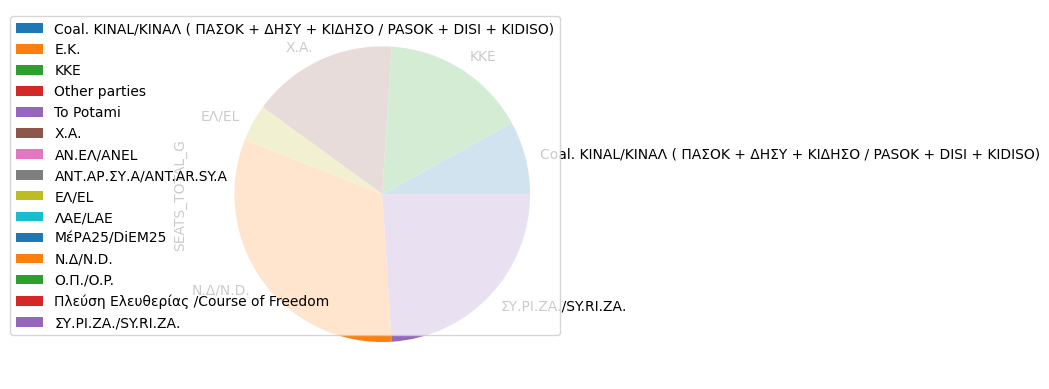

In [157]:
df19.groupby(['ACRONYM_y']).sum().plot(kind='pie', y='SEATS_TOTAL_G')